In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

# A function that reads files and returns three colums of the data
# First col = latitude, 2nd col = longitude, 3rd col = altitude
def Read_3_Column_File(file_name):
    data  = open(file_name, 'r')

    lines = data.readlines()
    
    #Remove first line
    lines.pop(0)
    
    lat = []
    long = []
    alt = []

    for line in lines:

        p = line.split()
        lat.append(float(p[0]))
        long.append(float(p[1]))
        alt.append(float(p[2]))
    data.close()
    return lat, long, alt

# We need an 89 by 89 matrix that would hold the latitudes and one that would hold the altitudes

def GimmeLats_alts(num, name):
    Lats = [[0]*89]*89
    Alts = [[0]*89]*89
    Long = [[0]*89]*89
    for i in range (0,num-1):
        file_string = '20191124_15UT' + name  + '/rayout_e'+ str(i+1) + name + '.txt'
        list_lat, list_long, list_alt = np.asarray(Read_3_Column_File(file_string))
        
        Lats[i] = list_lat
        Alts[i] = list_alt
        Long[i] = list_long

    
    return Lats, Alts, Long
                             

Lats5, Alts5   , Longs5   = GimmeLats_alts(90, '_5MHz')
Lats6, Alts6   , Longs6   = GimmeLats_alts(90, '_6MHz')
Lats8, Alts8   , Longs8   = GimmeLats_alts(90, '_8MHz')
Lats10, Alts10 , Longs10   = GimmeLats_alts(90, '_10MHz')
Lats11, Alts11 , Longs11   = GimmeLats_alts(90, '_11MHz')
Lats14, Alts14 , Longs14   = GimmeLats_alts(90, '_14MHz')

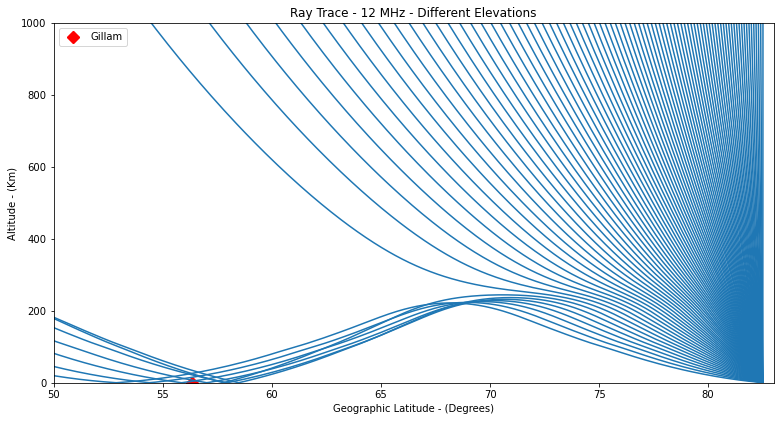

In [2]:
from pathlib import Path
fn = Path('mycoolfig.svg').expanduser()


fig = plt.figure(figsize=[10, 5])
ax = fig.add_axes([0, 0, 1, 1])
for i in range(89):
    plt.plot(Lats10[i], Alts10[i], color = 'C0')

plt.scatter(56.3480, 0, marker = 'x', linewidth = 10, label = 'Gillam', color = 'red')
ax.set_ylim(0, 1000)
ax.set_xlim(50, 83)
plt.xlabel('Geographic Latitude - (Degrees)')
plt.ylabel('Altitude - (Km)')
plt.title('Ray Trace - 12 MHz - Different Elevations')
plt.legend()

#fig.draw() # necessary to render figure before saving
fig.savefig(fn, bbox_inches='tight')
plt.show()



<IPython.core.display.Javascript object>


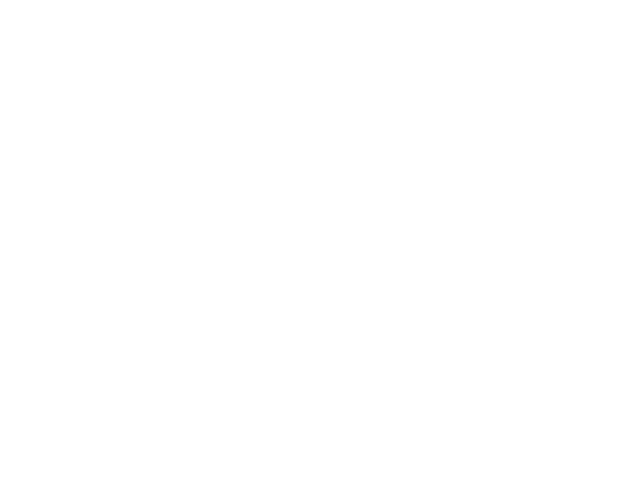

In [3]:
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')

for i in range(89):
    ax.plot(Lats10[i], Longs10[i], Alts10[i])
    
ax.scatter(56.3480, 360-94.7091, marker = 'x', linewidth = 10, label = 'Gillam', color = 'red')

ax.set_xlabel("Latitude")
ax.set_ylabel("Longitude")
ax.set_zlabel("Altitude")
ax.set_xlim3d(-50, 100)
ax.set_ylim3d(0, 300)
ax.set_zlim3d(0, 2000)
ax.legend(loc = 'best')

<IPython.core.display.Javascript object>


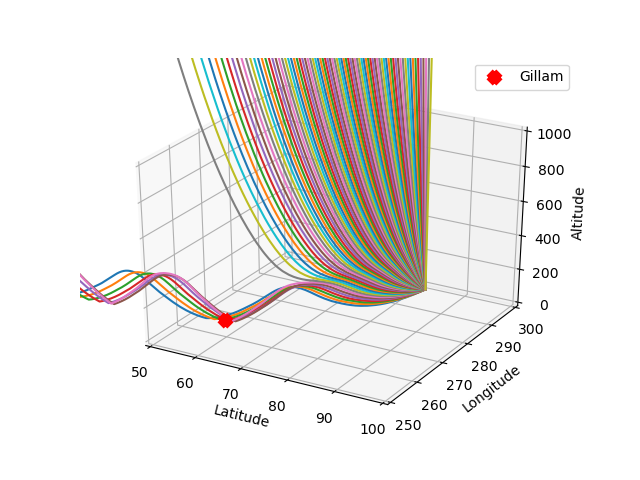

In [4]:
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(89):
    ax.plot(Lats10[i], Longs10[i], Alts10[i])
    
ax.scatter(56.3480, 360-94.7091, marker = 'x', linewidth = 10, label = 'Gillam', color = 'red')

ax.set_xlabel("Latitude")
ax.set_ylabel("Longitude")
ax.set_zlabel("Altitude")
ax.set_xlim3d(50, 100)
ax.set_ylim3d(250, 300)
ax.set_zlim3d(0, 1000)
ax.legend(loc = 'best')

To draw a cone we use the equation: 

$$ z = \sqrt{a^2 x^2 + b^2 y^2}  $$

Our radius goes from 0 to $ r = h \cdot tan(30) $ and our h goes from 0 to an altitude of 200 Km (this is arbitrary).

In [5]:
hf = 200
rf = hf * np.tan(30 *np.pi/180)

In [6]:
def truncated_cone(p0, p1, R0, R1, color, alpha = 0.5, label = None):
    """
    Based on https://stackoverflow.com/a/39823124/190597 (astrokeat)
    """
    # vector in direction of axis
    v = p1 - p0
    # find magnitude of vector
    mag = np.linalg.norm(v)
    # unit vector in direction of axis
    v = v / mag
    # make some vector not in the same direction as v
    not_v = np.array([1, 1, 0])
    if (v == not_v).all():
        not_v = np.array([0, 1, 0])
    # make vector perpendicular to v
    n1 = np.cross(v, not_v)
    # print n1,'\t',norm(n1)
    # normalize n1
    n1 /= np.linalg.norm(n1)
    # make unit vector perpendicular to v and n1
    n2 = np.cross(v, n1)
    # surface ranges over t from 0 to length of axis and 0 to 2*pi
    n = 80
    t = np.linspace(0, mag, n)
    theta = np.linspace(0, 2 * np.pi, n)
    # use meshgrid to make 2d arrays
    t, theta = np.meshgrid(t, theta)
    R = np.linspace(R0, R1, n)
    # generate coordinates for surface
    X, Y, Z = [p0[i] + v[i] * t + R *
               np.sin(theta) * n1[i] + R * np.cos(theta) * n2[i] for i in [0, 1, 2]]
    c3 = ax.plot_surface(X, Y, Z, color=color, linewidth=0, antialiased=False, alpha = alpha, label = label)
    
    
    if label:
        c3._facecolors2d=c3._facecolors3d
        c3._edgecolors2d=c3._edgecolors3d
        ax.legend()

##### To find the final radius in Longitude units:

We can use the appriximation that:

$$ 1^{\circ} \space \mathrm{Longitude} =  111.32 \cdot cos(\mathrm{Latitude})   ~km   $$

At Gillam Latitude = 56.3480, we have:

In [7]:
rf_long = rf /(111.32 * np.cos(56.3480*np.pi/180))
print(rf_long)

1.8718497386734994


<IPython.core.display.Javascript object>


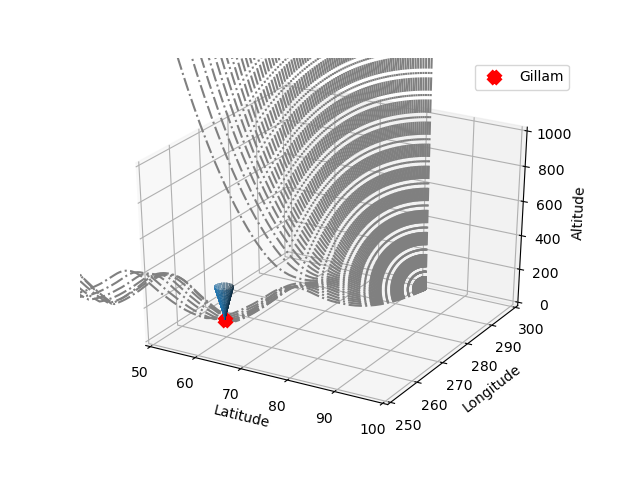

In [8]:
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(89):
    ax.plot(Lats10[i], Longs10[i], Alts10[i], linestyle = 'dashdot', color = 'grey')
    
ax.scatter(56.3480, 360-94.7091, marker = 'x', linewidth = 10, label = 'Gillam', color = 'red')

ax.set_xlabel("Latitude")
ax.set_ylabel("Longitude")
ax.set_zlabel("Altitude")
ax.set_xlim3d(50, 100)
ax.set_ylim3d(250, 300)
ax.set_zlim3d(0, 1000)
ax.legend(loc = 'best')

A0 = np.array([56.3480, 360-94.7091, 0])
A1 = np.array([56.3480, 360-94.7091, 200])

truncated_cone(A0, A1, 0, rf_long, 'C0', alpha = 0.2)


#### Optimization

To optimize this we can truncate the scatter points. We need only trace up to a certain point **(Gillam)**.

In [9]:
len(Lats5[1])

19999

<IPython.core.display.Javascript object>


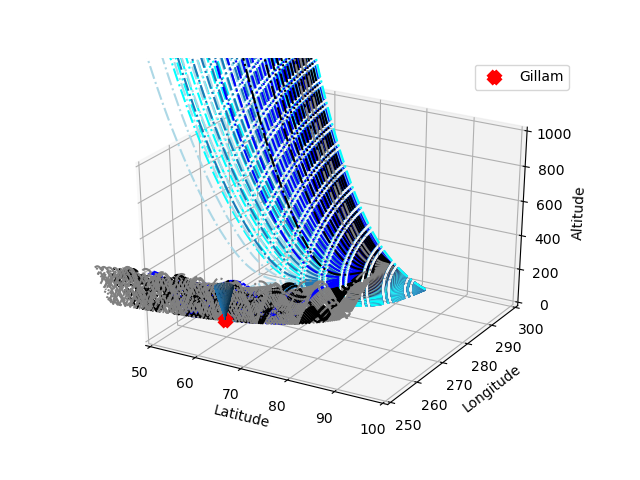

In [10]:
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

tunc = 6000

for i in range(40):
    ax.plot(Lats5[i][0:tunc], Longs5[i][0:tunc], Alts5[i][0:tunc], linestyle = 'dashdot', color = 'grey')
    ax.plot(Lats6[i][0:tunc], Longs6[i][0:tunc], Alts6[i][0:tunc], linestyle = 'dashdot', color = 'black')
    ax.plot(Lats8[i][0:tunc], Longs8[i][0:tunc], Alts8[i][0:tunc], linestyle = 'dashdot', color = 'blue')
    ax.plot(Lats10[i][0:tunc], Longs10[i][0:tunc], Alts10[i][0:tunc], linestyle = 'dashdot', color = 'C0')
    ax.plot(Lats11[i][0:tunc], Longs11[i][0:tunc], Alts11[i][0:tunc], linestyle = 'dashdot', color = 'lightblue')
    ax.plot(Lats14[i][0:tunc], Longs14[i][0:tunc], Alts14[i][0:tunc], linestyle = 'dashdot', color = 'cyan')
    
ax.scatter(56.3480, 360-94.7091, marker = 'x', linewidth = 10, label = 'Gillam', color = 'red')

ax.set_xlabel("Latitude")
ax.set_ylabel("Longitude")
ax.set_zlabel("Altitude")
ax.set_xlim3d(50, 100)
ax.set_ylim3d(250, 300)
ax.set_zlim3d(0, 1000)
ax.legend(loc = 'best')

A0 = np.array([56.3480, 360-94.7091, 0])
A1 = np.array([56.3480, 360-94.7091, 200])

truncated_cone(A0, A1, 0, rf_long, 'C0', alpha = 0.2)


In [11]:
r85 = 85 * np.tan(30 * np.pi /180)
r105 = 105 * np.tan(30 * np.pi /180)

r85_long = r85 /(111.32 * np.cos(56.3480*np.pi/180))
r105_long = r105 /(111.32 * np.cos(56.3480*np.pi/180))

<IPython.core.display.Javascript object>


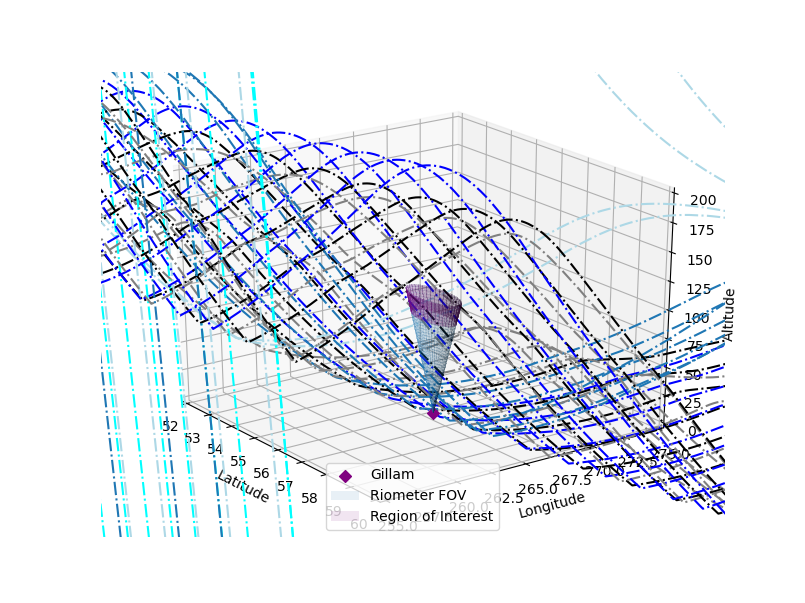

In [12]:
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

tunc = 10000

for i in range(10):
    ax.plot(Lats5[i][0:tunc], Longs5[i][0:tunc], Alts5[i][0:tunc], linestyle = 'dashdot', color = 'grey')
    ax.plot(Lats6[i][0:tunc], Longs6[i][0:tunc], Alts6[i][0:tunc], linestyle = 'dashdot', color = 'black')
    ax.plot(Lats8[i][0:tunc], Longs8[i][0:tunc], Alts8[i][0:tunc], linestyle = 'dashdot', color = 'blue')
    ax.plot(Lats10[i][0:tunc], Longs10[i][0:tunc], Alts10[i][0:tunc], linestyle = 'dashdot', color = 'C0')
    ax.plot(Lats11[i][0:tunc], Longs11[i][0:tunc], Alts11[i][0:tunc], linestyle = 'dashdot', color = 'lightblue')
    ax.plot(Lats14[i][0:tunc], Longs14[i][0:tunc], Alts14[i][0:tunc], linestyle = 'dashdot', color = 'cyan')
    
ax.scatter(56.3480, 360-94.7091, marker = 'x', linewidth = 7, label = 'Gillam', color = 'purple')

A0 = np.array([56.3480, 360-94.7091, 0])
A1 = np.array([56.3480, 360-94.7091, 105])

R0 = np.array([56.3480, 360-94.7091, 85])
R1 = np.array([56.3480, 360-94.7091, 105])

truncated_cone(A0, A1, 0, r105_long, 'C0', alpha=0.1, label = 'Riometer FOV')
truncated_cone(R0, R1, r85_long, r105_long, 'purple', alpha=0.1, label = 'Region of Interest')

ax.set_xlabel("Latitude")
ax.set_ylabel("Longitude")
ax.set_zlabel("Altitude")
ax.set_xlim3d(52, 60)
ax.set_ylim3d(255, 275)
ax.set_zlim3d(0, 200)
ax.legend(loc = 'best')




Another way is to convert to Km and reverse the process.

6230.6237519999995


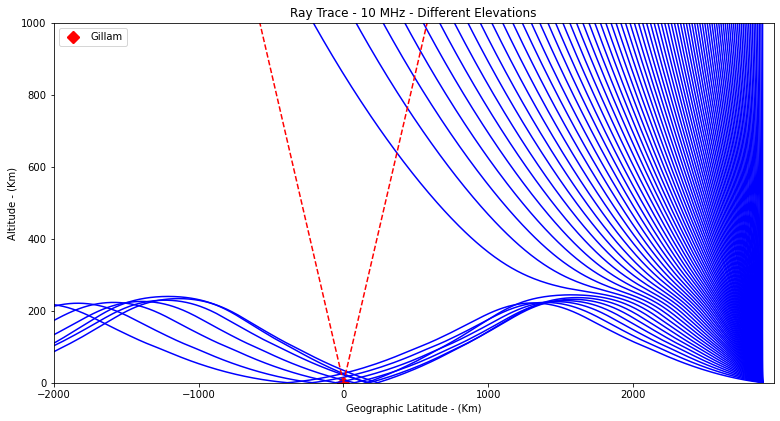

In [70]:
%matplotlib inline
from pathlib import Path
fn = Path('mycoolfig.svg').expanduser()

Gillam = 56.3480*110.574
print(Gillam)

fig = plt.figure(figsize=[10, 5])
ax = fig.add_axes([0, 0, 1, 1])
for i in range(89):
    plt.plot(Lats10[i]*110.574 - Gillam , Alts10[i], color = 'blue')

plt.scatter(0 , 0, marker = 'x', linewidth = 10, label = 'Gillam', color = 'red')


linex = np.linspace(0, 9200, 10000)
liney = m*linex 


plt.plot(linex, liney, color = 'red', linestyle  = '--')
plt.plot(-linex, liney, color = 'red',linestyle =  '--')

ax.set_ylim(0, 1000)
ax.set_xlim(-2000, 9200 - Gillam)
plt.xlabel('Geographic Latitude - (Km)')
plt.ylabel('Altitude - (Km)')
plt.title('Ray Trace - 10 MHz - Different Elevations')
plt.legend()

#fig.draw() # necessary to render figure before saving
fig.savefig(fn, bbox_inches='tight')
plt.show()


Lets make a new plot with the cone over Gillam showing. We know:
$$ \mathrm{slope} = m = tan(\theta) = tan(60) $$ 

In [66]:
m = np.tan(60 * np.pi /180)

Now we want to draw two lines with that slope going above Gilliam.

6230.6237519999995


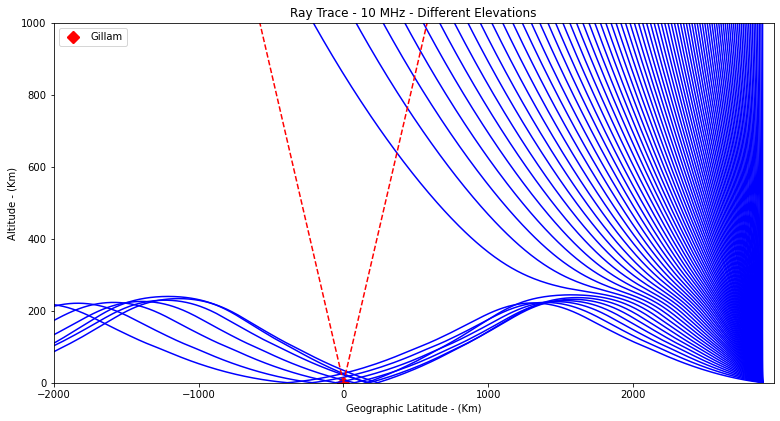

In [81]:
from pathlib import Path
fn = Path('mycoolfig.svg').expanduser()

Gillam = 56.3480*110.574
print(Gillam)

fig = plt.figure(figsize=[10, 5])
ax = fig.add_axes([0, 0, 1, 1])
for i in range(89):
    plt.plot(Lats10[i]*110.574 - Gillam , Alts10[i], color = 'blue')

plt.scatter(0 , 0, marker = 'x', linewidth = 10, label = 'Gillam', color = 'red')


linex = np.linspace(0, 9200, 10000)
liney = m*linex 


plt.plot(linex, liney, color = 'red', linestyle  = '--')
plt.plot(-linex, liney, color = 'red',linestyle =  '--')

ax.set_ylim(0, 1000)
ax.set_xlim(-2000, 9200 - Gillam)
plt.xlabel('Geographic Latitude - (Km)')
plt.ylabel('Altitude - (Km)')
plt.title('Ray Trace - 10 MHz - Different Elevations')
plt.legend()

#fig.draw() # necessary to render figure before saving
fig.savefig(fn, bbox_inches='tight')
plt.show()


Let us now zoom in on this plot considering only the portion of the cone we are interested in and make a few illustrations.

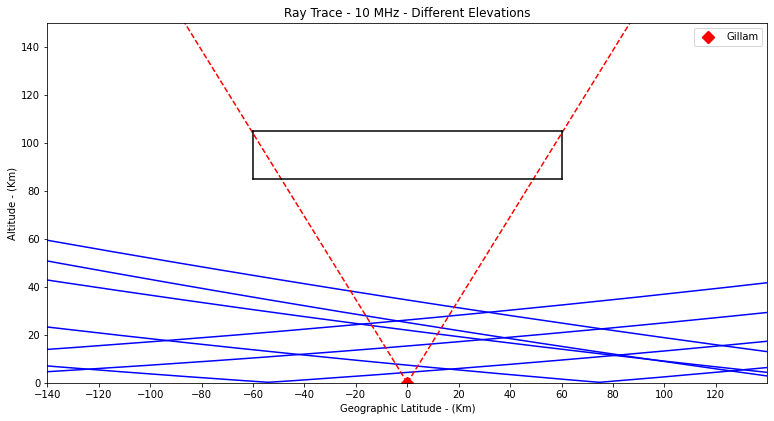

In [113]:


fig = plt.figure(figsize=[10, 5])
ax = fig.add_axes([0, 0, 1, 1])
for i in range(89):
    plt.plot(Lats10[i]*110.574 - Gillam , Alts10[i], color = 'blue')

plt.scatter(0 , 0, marker = 'x', linewidth = 10, label = 'Gillam', color = 'red')


linex = np.linspace(0, 9200, 10000)
liney = m*linex 


plt.plot(linex, liney, color = 'red', linestyle  = '--')
plt.plot(-linex, liney, color = 'red',linestyle =  '--')

ax.set_ylim(0, 150)
ax.set_xlim(-140, 140)

plt.xticks(np.arange(-140, 140, 20))

hor_linex = np.linspace(-60, 60, 1000)
hor_liney1 = np.linspace(105,105, 1000)
hor_liney2 = np.linspace(85,85, 1000)

ver_linex2 = np.linspace(-60, -60, 1000)
ver_linex3 = np.linspace(60, 60, 1000)

plt.plot(ver_linex2, np.linspace(85, 105, 1000), color = 'Black')
plt.plot(ver_linex3, np.linspace(85, 105, 1000), color = 'Black')

plt.plot(hor_linex, hor_liney1, color = 'Black')
plt.plot(hor_linex, hor_liney2, color = 'Black')

plt.xlabel('Geographic Latitude - (Km)')
plt.ylabel('Altitude - (Km)')
plt.title('Ray Trace - 10 MHz - Different Elevations')
plt.legend()

#fig.draw() # necessary to render figure before saving
fig.savefig(fn, bbox_inches='tight')
plt.show()


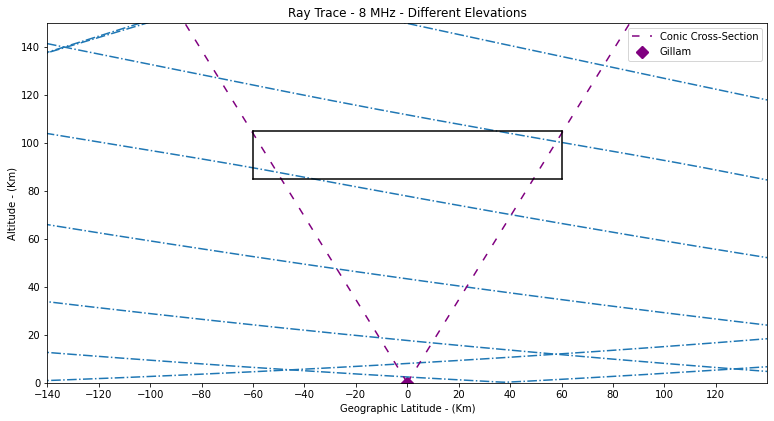

In [128]:


fig = plt.figure(figsize=[10, 5])
ax = fig.add_axes([0, 0, 1, 1])
for i in range(89):
    plt.plot(Lats8[i]*110.574 - Gillam , Alts8[i], color = 'C0', linestyle = 'dashdot')

plt.scatter(0 , 0, marker = 'x', linewidth = 10, label = 'Gillam', color = 'Purple')


linex = np.linspace(0, 9200, 10000)
liney = m*linex 


plt.plot(linex, liney, color = 'Purple', linestyle  = (0, (5, 7)), label = 'Conic Cross-Section')
plt.plot(-linex, liney, color = 'Purple',linestyle =  (0, (5, 7)))

ax.set_ylim(0, 150)
ax.set_xlim(-140, 140)

plt.xticks(np.arange(-140, 140, 20))

hor_linex = np.linspace(-60, 60, 1000)
hor_liney1 = np.linspace(105,105, 1000)
hor_liney2 = np.linspace(85,85, 1000)

ver_linex2 = np.linspace(-60, -60, 1000)
ver_linex3 = np.linspace(60, 60, 1000)

plt.plot(ver_linex2, np.linspace(85, 105, 1000), color = 'Black')
plt.plot(ver_linex3, np.linspace(85, 105, 1000), color = 'Black')

plt.plot(hor_linex, hor_liney1, color = 'Black')
plt.plot(hor_linex, hor_liney2, color = 'Black')

plt.xlabel('Geographic Latitude - (Km)')
plt.ylabel('Altitude - (Km)')
plt.title('Ray Trace - 8 MHz - Different Elevations')
plt.legend()

#fig.draw() # necessary to render figure before saving
fig.savefig(fn, bbox_inches='tight')
plt.show()


In [102]:
def plot_freq_ax(freq, Lats, Alts, fig = True, axes = None, legend = False):

    if fig: plt.figure(figsize=(14,7))
    ax = plt.gca() if axes is None else axes
    
    for i in range(89):
        ax.plot(Lats[i], Alts[i])
        
    ax.scatter(56.3480, 0, marker = "^", s = 150, label = 'Gillam', color = 'red')
    #ax.scatter(82, 0, marker = "^", s = 150, label = 'Alert', color = 'black')
    #ax.plot(Lats,Alts)
    
    ax.set_ylim(0, 1000)
    ax.set_xlim(50, 82)

    #ax.set_xlabel('Geographic Latitude - (Degrees)')
    #ax.set_ylabel('Altitude - (Km)')
    ax.set_title('Different Elevations for ' + freq + ' at 15 UT')
    if legend: ax.legend(loc = "best")

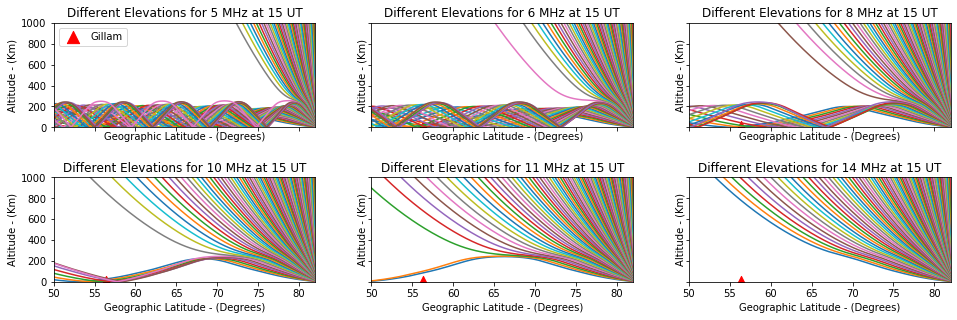

In [103]:
fig, axes = plt.subplots(2,3, figsize=(14,5), sharex = True, sharey = True)
fig.tight_layout(pad=4.0)

plt.setp(axes, xlabel = 'Geographic Latitude - (Degrees)', ylabel = 'Altitude - (Km)' )


plot_freq_ax('5 MHz', Lats5, Alts5, fig = False, axes=axes[0,0], legend = True)
plot_freq_ax('6 MHz', Lats6, Alts6, fig = False, axes=axes[0,1])
plot_freq_ax('8 MHz', Lats8, Alts8, fig = False, axes=axes[0,2] )
plot_freq_ax('10 MHz', Lats10, Alts10, fig = False, axes=axes[1,0] )
plot_freq_ax('11 MHz', Lats11, Alts11, fig = False, axes=axes[1,1] )
plot_freq_ax('14 MHz', Lats14, Alts14, fig = False, axes=axes[1,2] )